In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler


In [3]:
# tạo các cột theo các phần khối khác nhau
df = pd.DataFrame({
    'beta': np.random.beta(5,1,1000) * 60, 
#beta
    'exponential': np.random.exponential(10,1000),
#exponential
    'normal_p': np.random.normal(10,2,1000),
#normal platykurtic
    'normal_l': np.random.normal(10,10,1000),
#normal leptokurtic
})

In [4]:
first_half = np.random.normal(20,3,500)
second_half = np.random.normal(-20,3,500)
bimodal = np.concatenate([first_half,second_half])

# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l
0,52.662597,15.701674,10.993123,23.365220
1,59.844578,10.321474,10.858224,24.115226
2,48.361181,7.344074,9.321970,10.399204
3,57.221257,0.314350,8.641387,-7.655304
4,39.187943,0.072010,10.999731,10.432897


<AxesSubplot:ylabel='Density'>

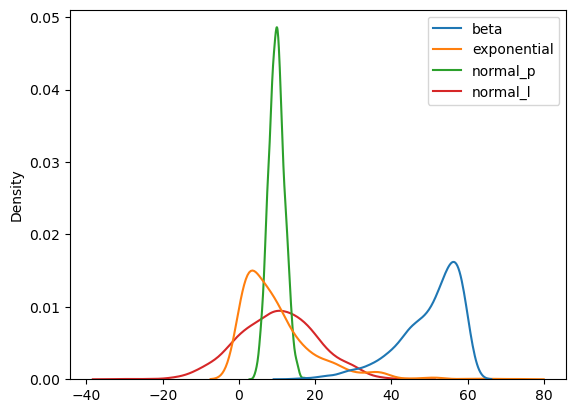

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.102805,10.180649,9.875583,10.233261
std,8.270027,9.884726,2.048306,10.240891
min,15.339452,0.022578,4.334308,-30.618029
25%,45.350242,3.049227,8.513658,3.186706
50%,52.491850,7.509976,9.852343,10.253555
75%,56.664272,13.740069,11.206336,17.226934
max,59.962703,72.515850,17.166040,43.691081


<AxesSubplot:ylabel='Density'>

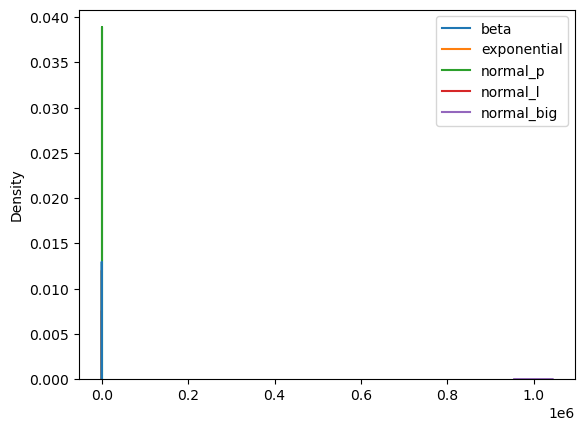

In [7]:
normal_big = np.random.normal(1000000,10000,(1000,1))
#normal distribution of large values

df['normal_big'] = normal_big
sns.kdeplot(data=df)

In [8]:
df.describe()

,beta,exponential,normal_p,normal_l,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,50.102805,10.180649,9.875583,10.233261,9.998684e+05
std,8.270027,9.884726,2.048306,10.240891,1.006887e+04
min,15.339452,0.022578,4.334308,-30.618029,9.619668e+05
25%,45.350242,3.049227,8.513658,3.186706,9.933985e+05
50%,52.491850,7.509976,9.852343,10.253555,9.998449e+05
75%,56.664272,13.740069,11.206336,17.226934,1.006240e+06
max,59.962703,72.515850,17.166040,43.691081,1.035693e+06


In [ ]:
normal_big = np.random(1000000,10000,(1000,1))
df['normal_big'] = normal_big
sns.kdeplot(data=df)


<AxesSubplot:>

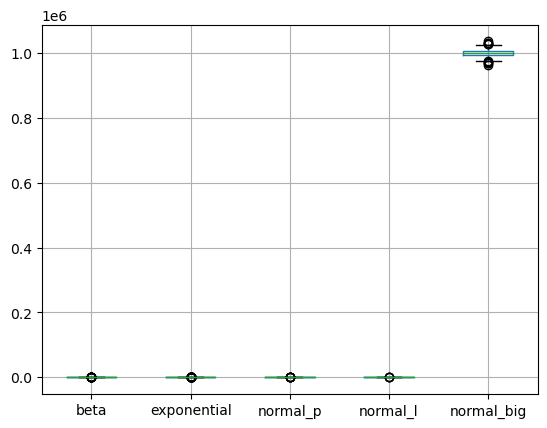

In [9]:
df.boxplot()

In [10]:
scaler = RobustScaler()

In [12]:
# chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

#lấy danh sách cột
col_names = list(df.columns)

#chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns = col_names)

df_s.head()

,beta,exponential,normal_p,normal_l,normal_big
0,0.015092,0.766235,0.423660,0.933864,0.281319
1,0.649877,0.262982,0.373561,0.987283,-0.231578
2,-0.365093,-0.015518,-0.196969,0.010374,-0.874356
3,0.418013,-0.673064,-0.449722,-1.275539,-0.971122
4,-1.175877,-0.695732,0.426114,0.012773,-1.171760


<AxesSubplot:ylabel='Density'>

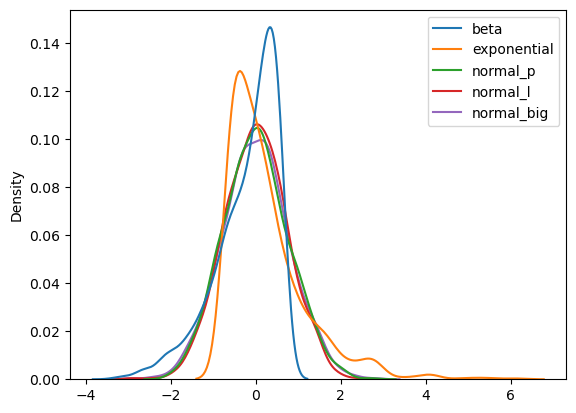

In [13]:
sns.kdeplot(data=df_s)

In [15]:
df_s.describe()

,beta,exponential,normal_p,normal_l,normal_big
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,-2.111577e-01,2.498094e-01,0.008631,-0.001445,0.001828
std,7.309532e-01,9.245975e-01,0.760695,0.729396,0.784083
min,-3.283746e+00,-7.003562e-01,-2.049274,-2.911034,-2.949641
25%,-6.312170e-01,-4.172496e-01,-0.497158,-0.503329,-0.501991
50%,3.140392e-16,-4.163336e-17,0.000000,0.000000,0.000000
75%,3.687830e-01,5.827504e-01,0.502842,0.496671,0.498009
max,6.603176e-01,6.080519e+00,2.716143,2.381552,2.791536


<AxesSubplot:>

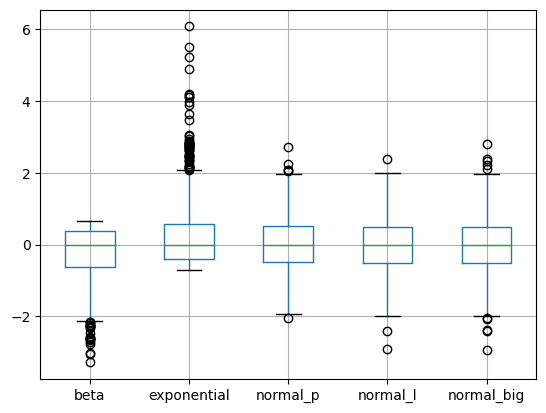

In [14]:
df_s.boxplot()

In [16]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.2837456859745617,
 -0.700356249105375,
 -2.049274187122729,
 -2.9110342564265306,
 -2.9496414318651407]

In [17]:
# lấy các giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.6603176257015723,
 6.080519119901902,
 2.7161426025867246,
 2.381551595023115,
 2.7915362790491884]

In [21]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc

scaler.center_


array([5.24918499e+01, 7.50997617e+00, 9.85234323e+00, 1.02535546e+01,
       9.99844891e+05])